In [1]:
import json

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
pd.options.display.max_rows = 4000

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
#returns shape of news and oped
def oped_v_news(df):
    df.type_of_material.hist()
    news = sum(df.type_of_material == "News")
    oped = sum(df.type_of_material == "Op-Ed")
    print(f'News: {news} Oped: {oped}, Total: {oped+news}, Op-Ed {round(oped/(oped+news), 2)} of total')
    #plt.savefig('../img/oped_news_hist.png')

# split quoted text from article

In [7]:
#split document into article body and quotation
def quote_removal(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
        
    return(article, quotation)

# filter only printed articles

In [8]:
import os
import glob
import pandas as pd

#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
df2020 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv'
df2019 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv'

#combine print, type, text columns in the list
def printed(file):
    print_cols = ['_id','print_page','pub_date','keywords','type_of_material','lead_paragraph','text','web_url']    
    df = pd.read_csv(file, usecols=print_cols, index_col='_id', low_memory=False)
    df = df[df.print_page.isna() == False]
    df = df[~df.text.isna() == True]
    return df

# concat articles

In [9]:
import os
import glob
import pandas as pd

#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
df2020 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv'
df2019 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv'
df2018 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2018.csv'
df2017 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2017.csv'
df2016 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2016.csv'
df2015 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2015.csv'
df2014 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2014.csv'
df2013 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2013.csv'
df2012 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2012.csv'
df2011 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2011.csv'
df2010 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2010.csv'
df2009 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2009.csv'
df2008 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2008.csv'
df2007 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2007.csv'
df2006 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2006.csv'
df2005 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2005.csv'
df2004 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2004.csv'
df2003 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2003.csv'
df2002 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2002.csv'
df2001 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2001.csv'
df2000 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2000.csv'
df1999 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1999.csv'
df1998 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1998.csv'
df1997 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1997.csv'
df1996 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1996.csv'
df1995 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1995.csv'
df1994 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1994.csv'
df1993 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1993.csv'
df1992 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1992.csv'
df1991 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1991.csv'
df1990 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1990.csv'
df1989 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1989.csv'
df1988 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1988.csv'
df1987 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1987.csv'
df1986 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1986.csv'
df1985 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1985.csv'
df1984 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1984.csv'
df1983 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1983.csv'
df1982 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1982.csv'
df1981 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1981.csv'

In [10]:
#combine print, type, text columns in the list
def printed(file):
    print_cols = ['_id','print_page','pub_date','keywords','type_of_material','lead_paragraph','text']    
    df = pd.read_csv(file, usecols=print_cols, index_col='_id', low_memory=False)
    df = df[df.print_page.isna() == False]
    df = df[~df.text.isna() == True]
    return df

In [11]:
#returns articles w/ 'United States Politics and Government' as a keyword
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get('value') == 'United States Politics and Government':
            return True

def keyword_filter(df, keyword='United States Politics and Government'):
    df[keyword] = df.apply(return_pol_gov, axis=1)
    df = df[df[keyword] == True]
    return df

In [12]:
#returns shape of news and oped
def oped_v_news(df):
    df.type_of_material.hist()
    news = sum(df.type_of_material == "News")
    oped = sum(df.type_of_material == "Op-Ed")
    print(f'News: {news} Oped: {oped}, Total: {oped+news}, Op-Ed {round(oped/(oped+news), 2)} of total')
    #plt.savefig('../img/oped_news_hist.png')

# data

In [13]:
data = printed(df2020)

In [14]:
data.shape

(27752, 6)

In [15]:
data.columns
df = data.copy()

In [16]:
%%time
df = keyword_filter(data)

CPU times: user 2.69 s, sys: 44.1 ms, total: 2.73 s
Wall time: 2.77 s


In [17]:
df.shape

(4585, 7)

In [18]:
df.text[0][:500]

'On the first Monday in May, the Department of Justice headquarters in Washington was on coronavirus lockdown — or at least it appeared to be from the outside. Signs posted on the outer doors facing Constitution Avenue admonished visitors to keep out if they had symptoms of Covid-19 or had been “exposed to any person diagnosed” with it. Inside, the guards operating the X-ray machines wore masks and gloves. Across the lobby, a free-standing pump of hand sanitizer cast a cautionary shadow down empt'

In [19]:
df['text'] = [text.replace(lead, "") for text, lead in zip(df.text[:].astype('str'), df.lead_paragraph[:].astype('str'))]

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df.text[0][:500]

'But as you drew closer to the fifth floor, where Attorney General William Pelham Barr works out of a suite of offices, things started to loosen up. One assistant outside his conference room wore a mask, but the other did not. In the middle of the room, with its oil paintings and vaulted ceiling, the long central table had fewer chairs than you might expect, and an appropriate distance between them. But past the next door, inside the attorney general’s smaller personal office, Barr himself was al'

# remove quotations

In [21]:
#split document into article body and quotation
def text_parse(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
        
    return(article, quotation)

In [22]:
#split article and return quote
def return_article(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
    
    return(article)

In [23]:
#split article and return quote
def return_quote(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
        
    return(quotation)

In [24]:
df['article'] = df.text.apply(return_article)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df['article'][0][:500]

'But as you drew closer to the fifth floor, where Attorney General William Pelham Barr works out of a suite of offices, things started to loosen up. One assistant outside his conference room wore a mask, but the other did not. In the middle of the room, with its oil paintings and vaulted ceiling, the long central table had fewer chairs than you might expect, and an appropriate distance between them. But past the next door, inside the attorney general’s smaller personal office, Barr himself was al'

In [26]:
df['quote_list'] = df.text.apply(return_quote)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df['quote_list'][0][:500]

'I’m not going to insist that you have a mask, rumpled, If you want to take it off … , I’m not going to infect you, Go ahead and take it off, opportunistic the product of some festering injustice. respect and support, might find themselves without the police protection they need. freedom liberate liberation disfavored speech and undue interference with the national economy. total I think the federal government does have the power to step in where a state is impairing interstate commerce, where th'

In [28]:
def keyword_string(row):
    
    dictionary_list = (eval(row))
    output = " "
    
    for dictionary in dictionary_list:
        dict_value = dictionary.get('value')
        output += (f'{dict_value} ')
    return output.split(" ")
 

In [29]:
df['keyword_list'] =  df.keywords.apply(keyword_string)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['keyword_list'][0]

['',
 'Barr,',
 'William',
 'P',
 'Justice',
 'Department',
 'United',
 'States',
 'Politics',
 'and',
 'Government',
 'Presidential',
 'Election',
 'of',
 '2020',
 'Trump,',
 'Donald',
 'J',
 'Presidents',
 'and',
 'Presidency',
 '(US)',
 'Special',
 'Prosecutors',
 '(Independent',
 'Counsel)',
 'Central',
 'Intelligence',
 'Agency',
 'Bush,',
 'George',
 'Attorneys',
 'General',
 '']

In [31]:
#returns articles w/ 'United States Politics and Government' as a keyword
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get('value') == 'United States Politics and Government':
            return True

def keyword_filter(df, keyword='United States Politics and Government'):
    df[keyword] = df.apply(return_pol_gov, axis=1)
    df = df[df[keyword] == True]
    return df

In [32]:
df2020 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv'
df2019 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv'
df2018 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2018.csv'

In [33]:
df_list = [df2020, df2019, df2018, df2017, df2016, df2015, df2014, df2013, df2012, df2011, df2010]

In [82]:
df_list_auto = []
for num in range(2010,2021):
    df_list_auto.append(f'/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_{num}.csv')

In [83]:
df_list_auto

['/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2010.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2011.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2012.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2013.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2014.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2015.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2016.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2017.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2018.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv']

In [84]:
#combine print, type, text columns in the list
def data_sizes(list_files):
    
    dfnames = []
    df_sizes = []
    printed_sizes = []
    keyword_sizes = []
    
    print_cols = ['_id','print_page','pub_date','keywords','type_of_material',]
    
    for file in list_files:
        
        df_name = file[-8:-4]
        dfnames.append(df_name)
        
        df = pd.read_csv(file, usecols=print_cols, index_col='_id', low_memory=False)
        df_size = df.shape[0]
        df_sizes.append(df_size)
        
        df_printed = df[df.print_page.isna() == False]
        df_printed_size = df_printed.shape[0]
        printed_sizes.append(df_printed_size)
        
#        df = df[~df.text.isna() == True]

        keyword_df = keyword_filter(df)
        keyword_size = keyword_df.shape[0]
        keyword_sizes.append(keyword_size)
        
    return (dfnames, df_sizes, printed_sizes, keyword_sizes)

In [85]:
dfnames, df_sizes, printed_sizes, keyword_sizes = data_sizes(df_list_auto)

In [86]:
dfnames, df_sizes, printed_sizes, keyword_sizes

(['2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020'],
 [43239, 61348, 78334, 65627, 64106, 57385, 50015, 44293, 43307, 41748, 43549],
 [36353, 34550, 35828, 37289, 38431, 36691, 34458, 32544, 31361, 30255, 27801],
 [1794, 1822, 1790, 1792, 1845, 1914, 1889, 5785, 5853, 5819, 6053])

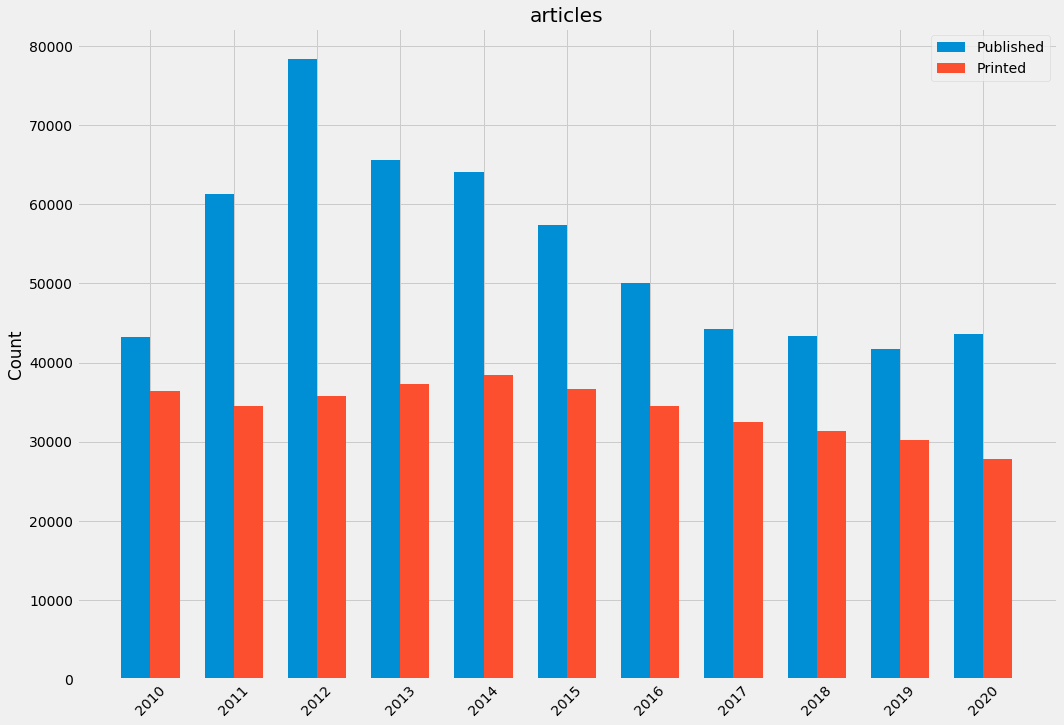

In [89]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(dfnames))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x - width/2, df_sizes, width, label='Published')
ax.bar(x + width/2, printed_sizes, width, label='Printed')
#ax.bar(x + width/2, keyword_sizes, width, label='KEYWORD: United States Politics and Government')

# ax.bar(x, df_sizes, width, label='Published')
# ax.bar(x, printed_sizes, width, label='Printed')
# ax.bar(x, keyword_sizes, width, label='KEYWORD: United States Politics and Government')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('articles')
ax.set_xticks(x)
#ax.set_yscale('log')
ax.set_xticklabels(dfnames)
ax.legend()


fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [88]:
dfnames, df_sizes, printed_sizes, keyword_sizes

(['2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020'],
 [43239, 61348, 78334, 65627, 64106, 57385, 50015, 44293, 43307, 41748, 43549],
 [36353, 34550, 35828, 37289, 38431, 36691, 34458, 32544, 31361, 30255, 27801],
 [1794, 1822, 1790, 1792, 1845, 1914, 1889, 5785, 5853, 5819, 6053])

In [41]:
# printed_2020 = printed(df2020)
# printed_2019 = printed(df2019)
# printed_2018 = printed(df2018)
# printed_2017 = printed(df2017)
# printed_2016 = printed(df2016)
# printed_2015 = printed(df2015)
# printed_2014 = printed(df2014)
# printed_2013 = printed(df2013)
# printed_2012 = printed(df2012)
# printed_2011 = printed(df2011)
# printed_2010 = printed(df2010)

In [42]:
# list_printed_2011_2020 = [printed_2020,
#                      printed_2019,
#                      printed_2018,
#                      printed_2017,
#                      printed_2016,
#                      printed_2015,
#                      printed_2014,
#                      printed_2013,
#                      printed_2012,
#                      printed_2011]
# printed_2011_2020 = pd.concat(list_printed_2011_2020)
# printed_2011_2020.to_csv("data/printed/printed_2011_2020.csv")

In [43]:
# printed_2010 = printed(df2010)
# printed_2009 = printed(df2009)
# printed_2008 = printed(df2008)
# printed_2007 = printed(df2007)
# printed_2006 = printed(df2006)
# printed_2005 = printed(df2005)
# printed_2004 = printed(df2004)
# printed_2003 = printed(df2003)
# printed_2002 = printed(df2002)
# printed_2001 = printed(df2001)

In [44]:
# list_printed_2001_2010 = [printed_2010,
#                      printed_2009,
#                      printed_2008,
#                      printed_2007,
#                      printed_2006,
#                      printed_2005,
#                      printed_2004,
#                      printed_2003,
#                      printed_2002,
#                      printed_2001]
# printed_2001_2010 = pd.concat(list_printed_2001_2010)
# printed_2001_2010.to_csv("data/printed/printed_2001_2010.csv")

In [45]:
# printed_2000 = printed(df2000)
# printed_1999 = printed(df1999)
# printed_1998 = printed(df1998)
# printed_1997 = printed(df1997)
# printed_1996 = printed(df1996)
# printed_1995 = printed(df1995)
# printed_1994 = printed(df1994)
# printed_1993 = printed(df1993)
# printed_1992 = printed(df1992)
# printed_1991 = printed(df1991)

In [46]:
# list_printed_1991_2000 = [printed_2000,
#                           printed_1999,
#                           printed_1998,
#                           printed_1997,
#                           printed_1996,
#                           printed_1995,
#                           printed_1994,
#                           printed_1993,
#                           printed_1992,
#                           printed_1991]
# printed_1991_2000 = pd.concat(list_printed_1991_2000)
# printed_1991_2000.to_csv("data/printed/printed_1991_2000.csv")

# broke here!!!

In [47]:
# printed_1990 = printed(df1990)
# printed_1989 = printed(df1989)
# printed_1988 = printed(df1988)
# printed_1987 = printed(df1987)
# printed_1986 = printed(df1986)
# printed_1985 = printed(df1985)
# printed_1984 = printed(df1984)
# printed_1983 = printed(df1983)
# printed_1982 = printed(df1982)
# printed_1981 = printed(df1981)

In [48]:
# list_printed_1981_1990 = [printed_1990,
#                           printed_1989,
#                           printed_1988,
#                           printed_1987,
#                           printed_1986,
#                           printed_1985,
#                           printed_1984,
#                           printed_1983,
#                           printed_1982,
#                           printed_1981]
# printed_1981_1990 = pd.concat(list_printed_1981_1990)
# printed_1981_1990.to_csv("data/printed/printed_1981_1990.csv")

In [49]:
# print(printed_2020.shape)
# print(printed_2019.shape)
# print(printed_2018.shape)
# print(printed_2017.shape)
# print(printed_2016.shape)
# print(printed_2015.shape)
# print(printed_2014.shape)
# print(printed_2013.shape)
# print(printed_2012.shape)
# print(printed_2011.shape)
# print(printed_2010.shape)
# print(printed_2009.shape)
# print(printed_2008.shape)
# print(printed_2007.shape)
# print(printed_2006.shape)
# print(printed_2005.shape)
# print(printed_2004.shape)
# print(printed_2003.shape)
# print(printed_2002.shape)
# print(printed_2001.shape)
# print(printed_2000.shape)
# print(printed_1999.shape)
# print(printed_1998.shape)
# print(printed_1997.shape)
# print(printed_1996.shape)
# print(printed_1995.shape)
# print(printed_1994.shape)
# print(printed_1993.shape)
# print(printed_1992.shape)
# print(printed_1991.shape)
# print(printed_1990.shape)
# print(printed_1989.shape)
# print(printed_1988.shape)
# print(printed_1987.shape)
# print(printed_1986.shape)
# print(printed_1985.shape)
# print(printed_1984.shape)
# print(printed_1983.shape)
# print(printed_1982.shape)
# print(printed_1981.shape)

# filter keywords

In [50]:
# %%time
# keyword_df2020 = filter_keyword(printed_2020)
# keyword_df2019 = filter_keyword(printed_2019)
# keyword_df2018 = filter_keyword(printed_2018)
# keyword_df2017 = filter_keyword(printed_2017)
# keyword_df2016 = filter_keyword(printed_2016)
# keyword_df2015 = filter_keyword(printed_2015)
# keyword_df2014 = filter_keyword(printed_2014)
# keyword_df2013 = filter_keyword(printed_2013)
# keyword_df2012 = filter_keyword(printed_2012)
# keyword_df2011 = filter_keyword(printed_2011)

In [51]:
# %%time
# keyword_df2010 = filter_keyword(printed_2010)
# keyword_df2009 = filter_keyword(printed_2009)
# keyword_df2008 = filter_keyword(printed_2008)
# keyword_df2007 = filter_keyword(printed_2007)
# keyword_df2006 = filter_keyword(printed_2006)
# keyword_df2005 = filter_keyword(printed_2005)
# keyword_df2004 = filter_keyword(printed_2004)
# keyword_df2003 = filter_keyword(printed_2003)
# keyword_df2002 = filter_keyword(printed_2002)
# keyword_df2001 = filter_keyword(printed_2001)

In [52]:
# %%time
# keyword_df2000 = filter_keyword(printed_2000)
# keyword_df1999 = filter_keyword(printed_1999)
# keyword_df1998 = filter_keyword(printed_1998)
# keyword_df1997 = filter_keyword(printed_1997)
# keyword_df1996 = filter_keyword(printed_1996)
# keyword_df1995 = filter_keyword(printed_1995)
# keyword_df1994 = filter_keyword(printed_1994)
# keyword_df1993 = filter_keyword(printed_1993)
# keyword_df1992 = filter_keyword(printed_1992)
# keyword_df1991 = filter_keyword(printed_1991)

In [53]:
# # %%time
# keyword_df1990 = filter_keyword(printed_1990)
# keyword_df1989 = filter_keyword(printed_1989)
# keyword_df1988 = filter_keyword(printed_1988)
# keyword_df1987 = filter_keyword(printed_1987)
# keyword_df1986 = filter_keyword(printed_1986)
# keyword_df1985 = filter_keyword(printed_1985)
# keyword_df1984 = filter_keyword(printed_1984)
# keyword_df1983 = filter_keyword(printed_1983)
# keyword_df1982 = filter_keyword(printed_1982)
# keyword_df1981 = filter_keyword(printed_1981)

In [54]:
# print(keyword_df2020.shape)
# print(keyword_df2019.shape)
# print(keyword_df2018.shape)
# print(keyword_df2017.shape)
# print(keyword_df2016.shape)
# print(keyword_df2015.shape)
# print(keyword_df2014.shape)
# print(keyword_df2013.shape)
# print(keyword_df2012.shape)
# print(keyword_df2011.shape)
# print(keyword_df2010.shape)
# print(keyword_df2009.shape)
# print(keyword_df2008.shape)
# print(keyword_df2007.shape)
# print(keyword_df2006.shape)
# print(keyword_df2005.shape)
# print(keyword_df2004.shape)
# print(keyword_df2003.shape)
# print(keyword_df2002.shape)
# print(keyword_df2001.shape)
# print(keyword_df2000.shape)
# print(keyword_df1999.shape)
# print(keyword_df1998.shape)
# print(keyword_df1997.shape)
# print(keyword_df1996.shape)
# print(keyword_df1995.shape)
# print(keyword_df1994.shape)
# print(keyword_df1993.shape)
# print(keyword_df1992.shape)
# print(keyword_df1991.shape)
# print(keyword_df1990.shape)
# print(keyword_df1989.shape)
# print(keyword_df1988.shape)
# print(keyword_df1987.shape)
# print(keyword_df1986.shape)
# print(keyword_df1985.shape)
# print(keyword_df1984.shape)
# print(keyword_df1983.shape)
# print(keyword_df1982.shape)
# print(keyword_df1981.shape)

In [55]:
# #concat df together
# df = pd.concat([keyword_df2020,
#                 keyword_df2019,
#                 keyword_df2018,
#                 keyword_df2017,
#                 keyword_df2016,
#                 keyword_df2015,
#                 keyword_df2014,
#                 keyword_df2013,
#                 keyword_df2012,
#                 keyword_df2011,
#                 keyword_df2010]#,
#                 keyword_df2009,
#                 keyword_df2008,
#                 keyword_df2007,
#                 keyword_df2006,
#                 keyword_df2005,
#                 keyword_df2004,
#                 keyword_df2003,
#                 keyword_df2002,
#                 keyword_df2001,
#                 keyword_df2000,
#                 keyword_df1999,
#                 keyword_df1998,
#                 keyword_df1997,
#                 keyword_df1996,
#                 keyword_df1995,
#                 keyword_df1994,
#                 keyword_df1993,
#                 keyword_df1992,
#                 keyword_df1991,
#                 keyword_df1990,
#                 keyword_df1989,
#                 keyword_df1988,
#                 keyword_df1987,
#                 keyword_df1986,
#                 keyword_df1985,
#                 keyword_df1984,
#                 keyword_df1983,
#                 keyword_df1982,
#                 keyword_df1981,
#                 keyword_df1980])